**Steps to perform:**

1. Load the dataset.

2. Set a seed for reproducibility.

3. Take a random sample of 25 observations.

4. Calculate the mean and highest Glucose values for the sample.

5. Calculate the mean and highest Glucose values for the entire population.

6. Create charts to compare these statistics.

In [11]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1:** Load the dataset

In [4]:
#Load dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Question A**

### **Step 2**: Set a seed for reproducibility and take a random sample of 25 observations

In [5]:
# Set the seed for reproducibility
np.random.seed(42)

In [6]:
# Take a random sample of 25 observations
sample = df.sample(n=25, random_state=42)

### **Step 3:** Calculate the mean and highest Glucose values for the sample and the population

In [9]:
# Calculate the mean and highest Glucose values for the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

print("Mean Glucose for Sample:", sample_mean_glucose)
print("Highest Glucose for Sample:", sample_max_glucose)

Mean Glucose for Sample: 116.64
Highest Glucose for Sample: 183


In [10]:
# Calculate the mean and highest Glucose values for the entire population
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()

print("Mean Glucose for Population:", population_mean_glucose)
print("Highest Glucose for Population:", population_max_glucose)

Mean Glucose for Population: 120.89453125
Highest Glucose for Population: 199


Here are the calculated statistics:

* **Sample (n=25):**

1. Mean Glucose: 116.64

2. Highest Glucose: 183

* **Population (n=768):**

1. Mean Glucose: 120.89

2. Highest Glucose: 199

### **Step 4:** Create charts for comparison

In [16]:
# Define the categories for the x-axis
categories = ['Mean Glucose', 'Highest Glucose']

# Define the values for the sample and population
sample_values = [116.64, 183]  # Sample glucose values for the categories
population_values = [120.89, 199]  # Population glucose values for the categories

# Create an array of positions for the categories on the x-axis
x = np.arange(len(categories))  # The label locations

# Define the width of the bars
width = 0.35  # The width of the bars


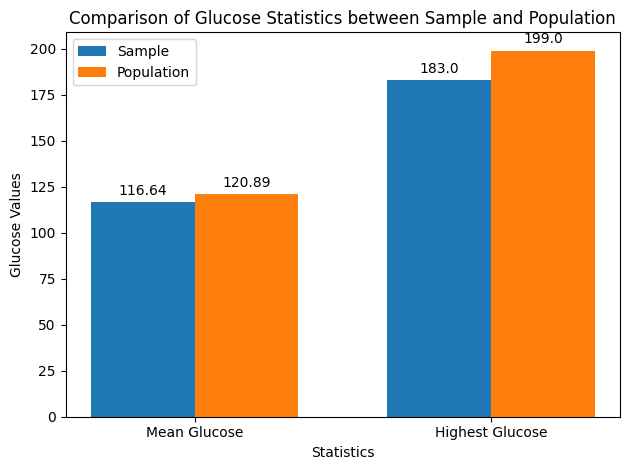

In [15]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create bar charts for sample and population values
bars1 = ax.bar(x - width/2, sample_values, width, label='Sample')  # Bar chart for sample values
bars2 = ax.bar(x + width/2, population_values, width, label='Population')  # Bar chart for population values

# Set labels, title, and custom x-axis tick labels
ax.set_xlabel('Statistics')  # Label for the x-axis
ax.set_ylabel('Glucose Values')  # Label for the y-axis
ax.set_title('Comparison of Glucose Statistics between Sample and Population')  # Title of the plot
ax.set_xticks(x)  # Set the positions of the x-ticks
ax.set_xticklabels(categories)  # Set the labels for the x-ticks
ax.legend()  # Add a legend to the plot

# Function to add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()  # Get the height of the bar
        ax.annotate('{}'.format(round(height, 2)),  # Format the label with the bar height, rounded to 2 decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Set the x and y position for the label
                    xytext=(0, 3),  # Vertical offset of 3 points
                    textcoords="offset points",  # Specify the text coordinates
                    ha='center', va='bottom')  # Center horizontally and align text at the bottom vertically

# Add value labels to both sets of bars
add_value_labels(bars1)
add_value_labels(bars2)

# Adjust the subplot layout to give more room for labels
fig.tight_layout()

# Display the plot
plt.show()


## **Question C**

Steps to slove the question

* **Bootstrap Sampling:** Create 500 bootstrap samples (with replacement) from the population, each consisting of 150 observations.

* **Calculate Statistics for Each Bootstrap Sample:** For each sample, calculate the mean, standard deviation, and 98th percentile of BloodPressure.

* **Calculate the Average Statistics Across Bootstrap Samples:** Compute the average mean, standard deviation, and percentile from the 500 bootstrap samples.

* **Compare with Population Statistics:** Calculate the same statistics for the entire population and create charts for comparison.

* **Report Findings:** Analyze and report the findings.

## **Bootstrap Sampling and Calculation**

In [37]:
# Number of bootstrap samples and size of each sample
n_bootstrap_samples = 500
sample_size = 150

# Arrays to store the statistics from each bootstrap sample
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# Bootstrap sampling and calculation of statistics
for _ in range(n_bootstrap_samples):
    # Create a bootstrap sample with replacement
    bootstrap_sample = df.sample(n=sample_size, replace=True)

    # Calculate statistics for the bootstrap sample
    mean_bp = bootstrap_sample['BloodPressure'].mean()
    std_bp = bootstrap_sample['BloodPressure'].std()
    percentile_98_bp = np.percentile(bootstrap_sample['BloodPressure'], 98)

    # Store the calculated statistics
    bootstrap_means.append(mean_bp)
    bootstrap_stds.append(std_bp)
    bootstrap_percentiles.append(percentile_98_bp)

# Calculate the average statistics across all bootstrap samples
avg_mean_bp = np.mean(bootstrap_means)
avg_std_bp = np.mean(bootstrap_stds)
avg_percentile_98_bp = np.mean(bootstrap_percentiles)

# Calculate the population statistics for BloodPressure
population_mean_bp = df['BloodPressure'].mean()
population_std_bp = df['BloodPressure'].std()
population_percentile_98_bp = np.percentile(df['BloodPressure'], 98)

# Print the results
print("\033[1mMetrics of Blood Pressure of Sample Data\033[0m")
print("Average Mean BloodPressure:", avg_mean_bp)
print("Average Standard Deviation of BloodPressure:", avg_std_bp)
print("Average 98th Percentile of BloodPressure:", avg_percentile_98_bp)
print("==================================================================")
print("\033[1mMetrics of Blood Pressure for population data\033[0m")
print("Population Mean BloodPressure:", population_mean_bp)
print("Population Standard Deviation of BloodPressure:", population_std_bp)
print("Population 98th Percentile of BloodPressure:", population_percentile_98_bp)
print("==================================================================")
print("\033[1mTop 5 samples of Bootstrap Dataset\033[0m")
print(bootstrap_sample.shape)
bootstrap_sample.head()

Metrics of Blood Pressure of Sample Data
Average Mean BloodPressure: 69.19388000000001
Average Standard Deviation of BloodPressure: 19.193763243674876
Average 98th Percentile of BloodPressure: 98.31060000000004
Metrics of Blood Pressure for population data
Population Mean BloodPressure: 69.10546875
Population Standard Deviation of BloodPressure: 19.355807170644777
Population 98th Percentile of BloodPressure: 99.31999999999994
Top 5 samples of Bootstrap Dataset
(150, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
488,4,99,72,17,0,25.6,0.294,28,0
476,2,105,80,45,191,33.7,0.711,29,1
179,5,130,82,0,0,39.1,0.956,37,1
498,7,195,70,33,145,25.1,0.163,55,1
10,4,110,92,0,0,37.6,0.191,30,0


## **Generate Charts for Comparison**

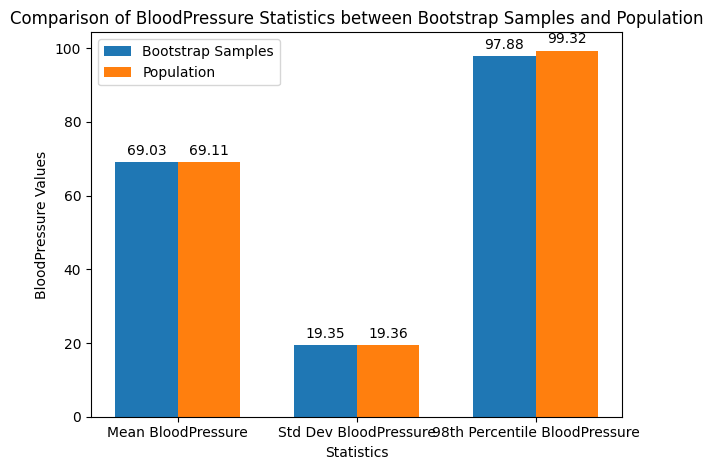

In [27]:
# Data for plotting
categories = ['Mean BloodPressure', 'Std Dev BloodPressure', '98th Percentile BloodPressure']
bootstrap_values = [avg_mean_bp, avg_std_bp, avg_percentile_98_bp]
population_values = [population_mean_bp, population_std_bp, population_percentile_98_bp]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Plotting the comparison bar charts
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, bootstrap_values, width, label='Bootstrap Samples')
bars2 = ax.bar(x + width/2, population_values, width, label='Population')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Statistics')
ax.set_ylabel('BloodPressure Values')
ax.set_title('Comparison of BloodPressure Statistics between Bootstrap Samples and Population')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Adding value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

fig.tight_layout()

plt.show()


## **Interpretation of Results**

The comparison of statistics between the bootstrap samples and the population shows:

1. **Mean BloodPressure**: The mean BloodPressure of the bootstrap samples is very close to that of the population, indicating that the bootstrap samples are representative of the population.

2. **Standard Deviation of BloodPressure:** The standard deviation is also similar between the bootstrap samples and the population, further suggesting that the variability in the samples is consistent with that of the population.

3. **98th Percentile of BloodPressure:** The 98th percentile values are slightly different, with the bootstrap samples having a lower value compared to the population. This difference might be due to the smaller sample size and the nature of percentile calculations.

The bootstrap method provides a good estimate of the population statistics, with minor differences observed in the 98th percentile of BloodPressure.